In [82]:
import csv
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 360

### Actividad 1

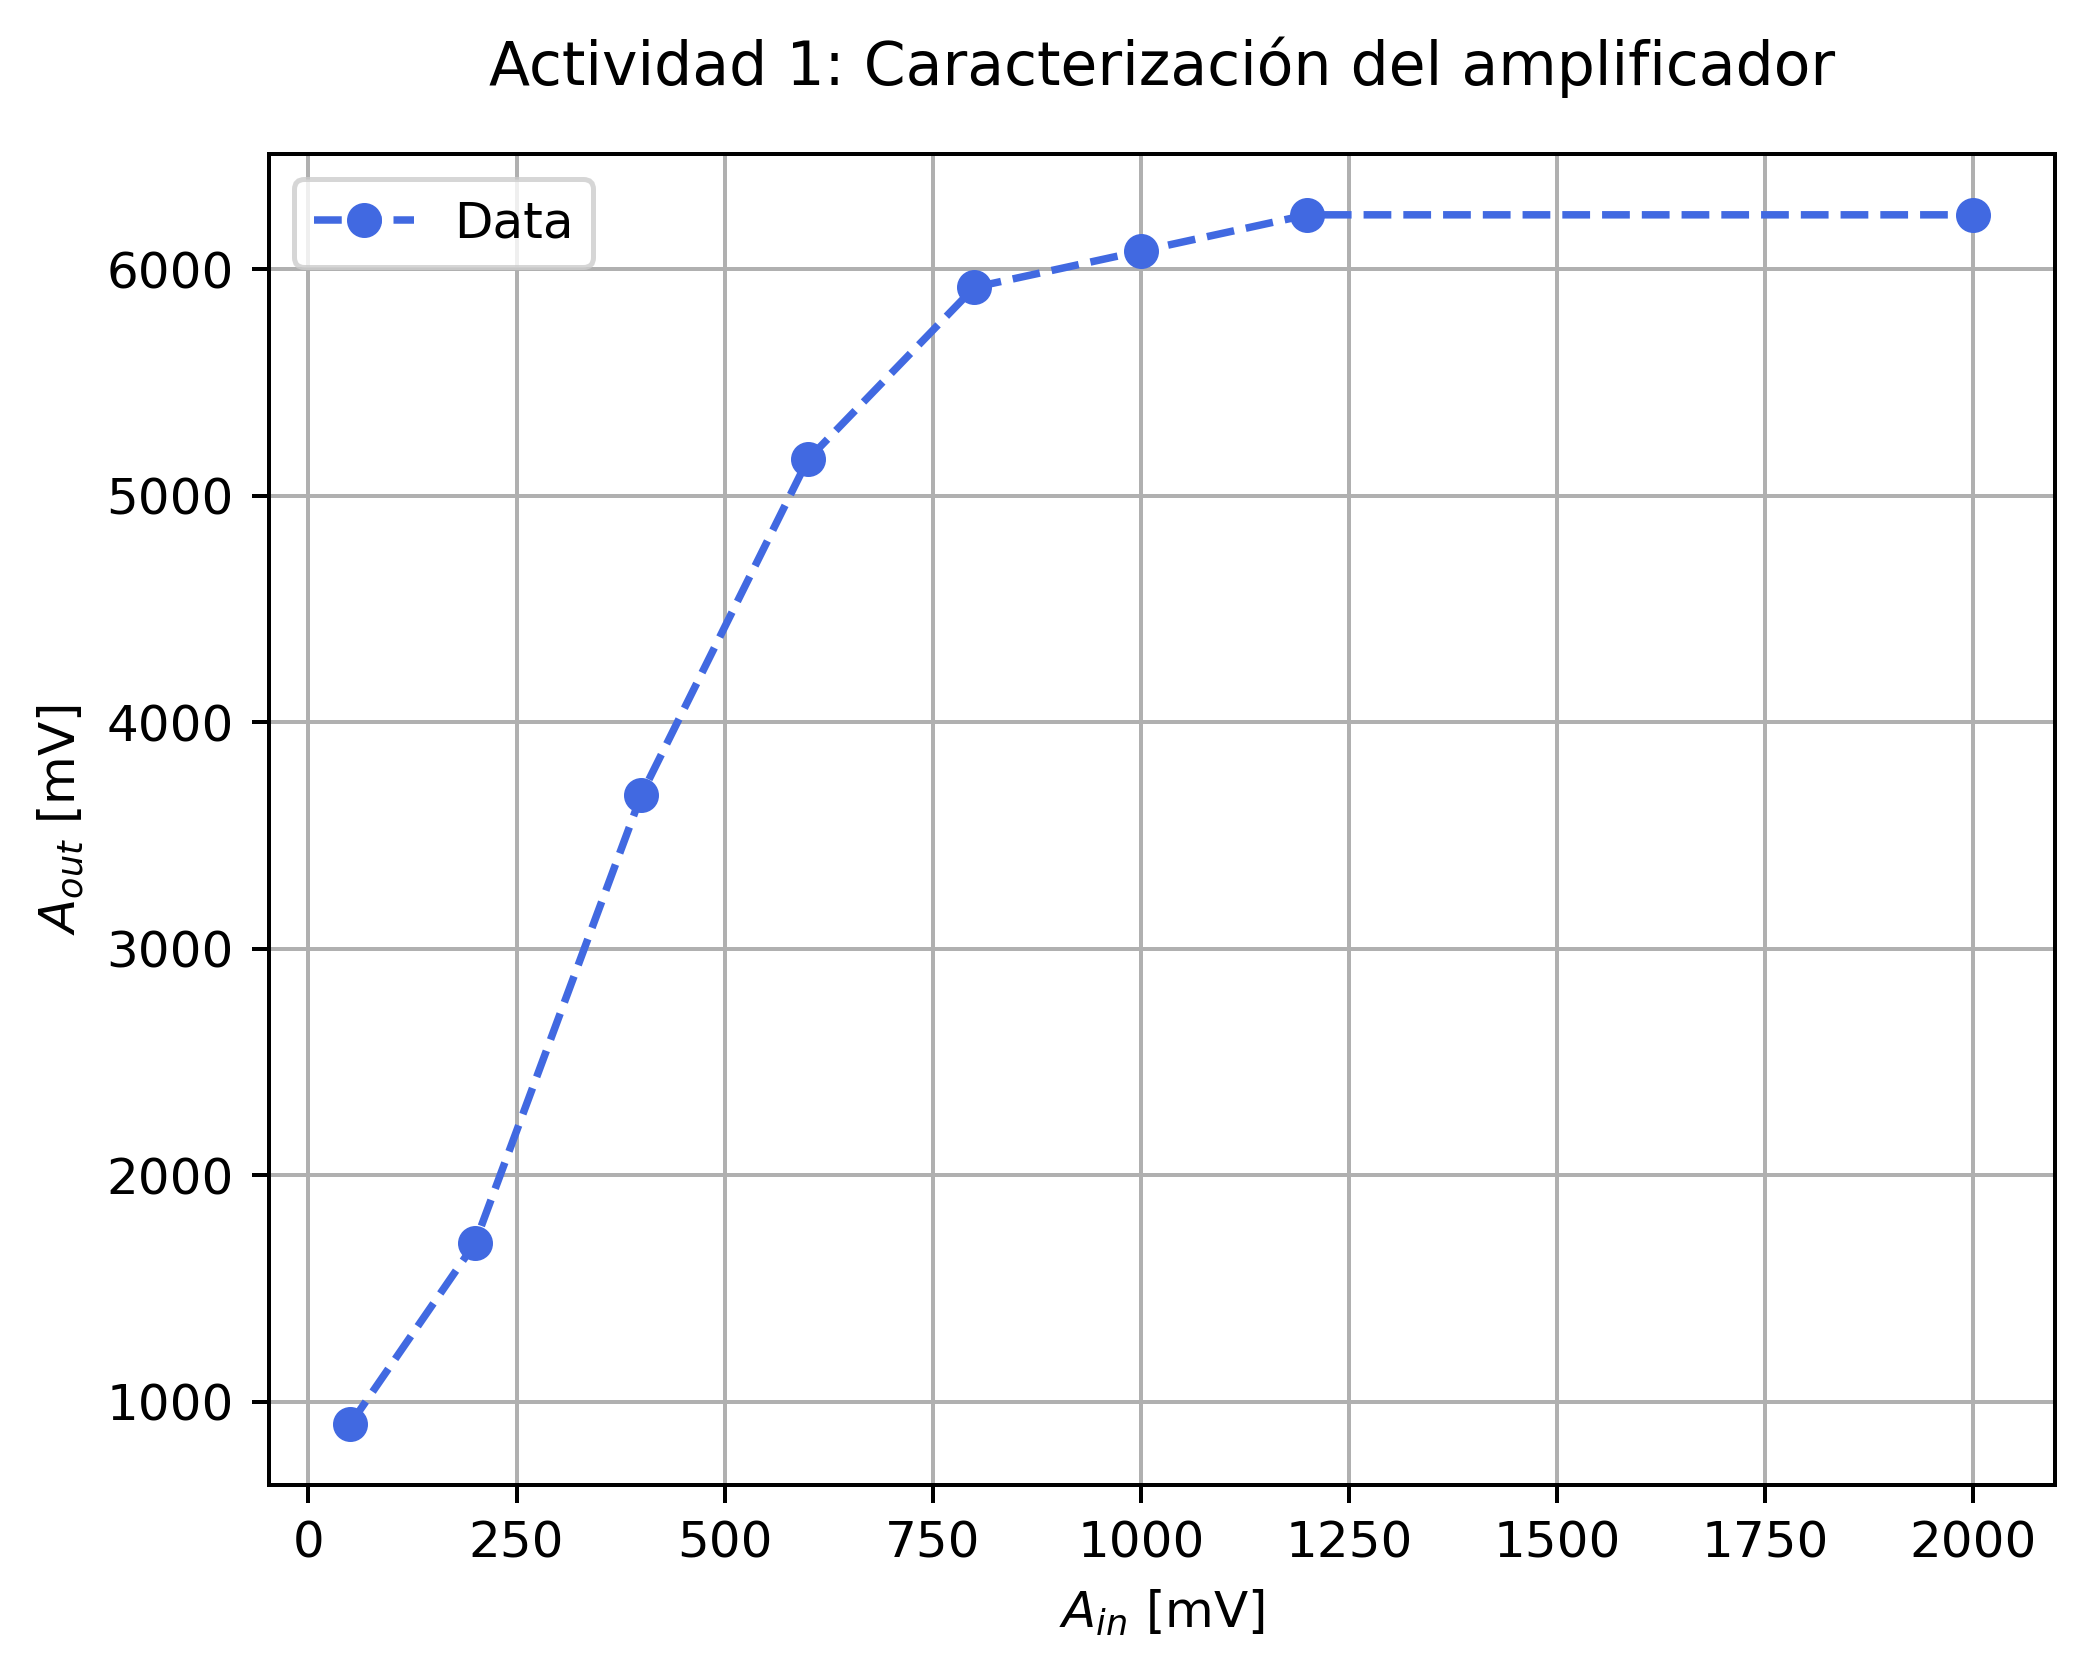

In [4]:
a_in = [50,200,400,600,800,1000,1200,2000]
a_out = [900,1700,3680,5160,5920,6080,6240,6240]

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(a_in, a_out, '--o', label='Data', color='royalblue')
ax.set_xlabel(r'$A_{in}$ [mV]')
ax.set_ylabel(r'$A_{out}$ [mV]')
plt.title('Actividad 1: Caracterización del amplificador', y=1.03)
plt.legend()
plt.grid()

### Actividad 5

/Users/valeriatorresgomez/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


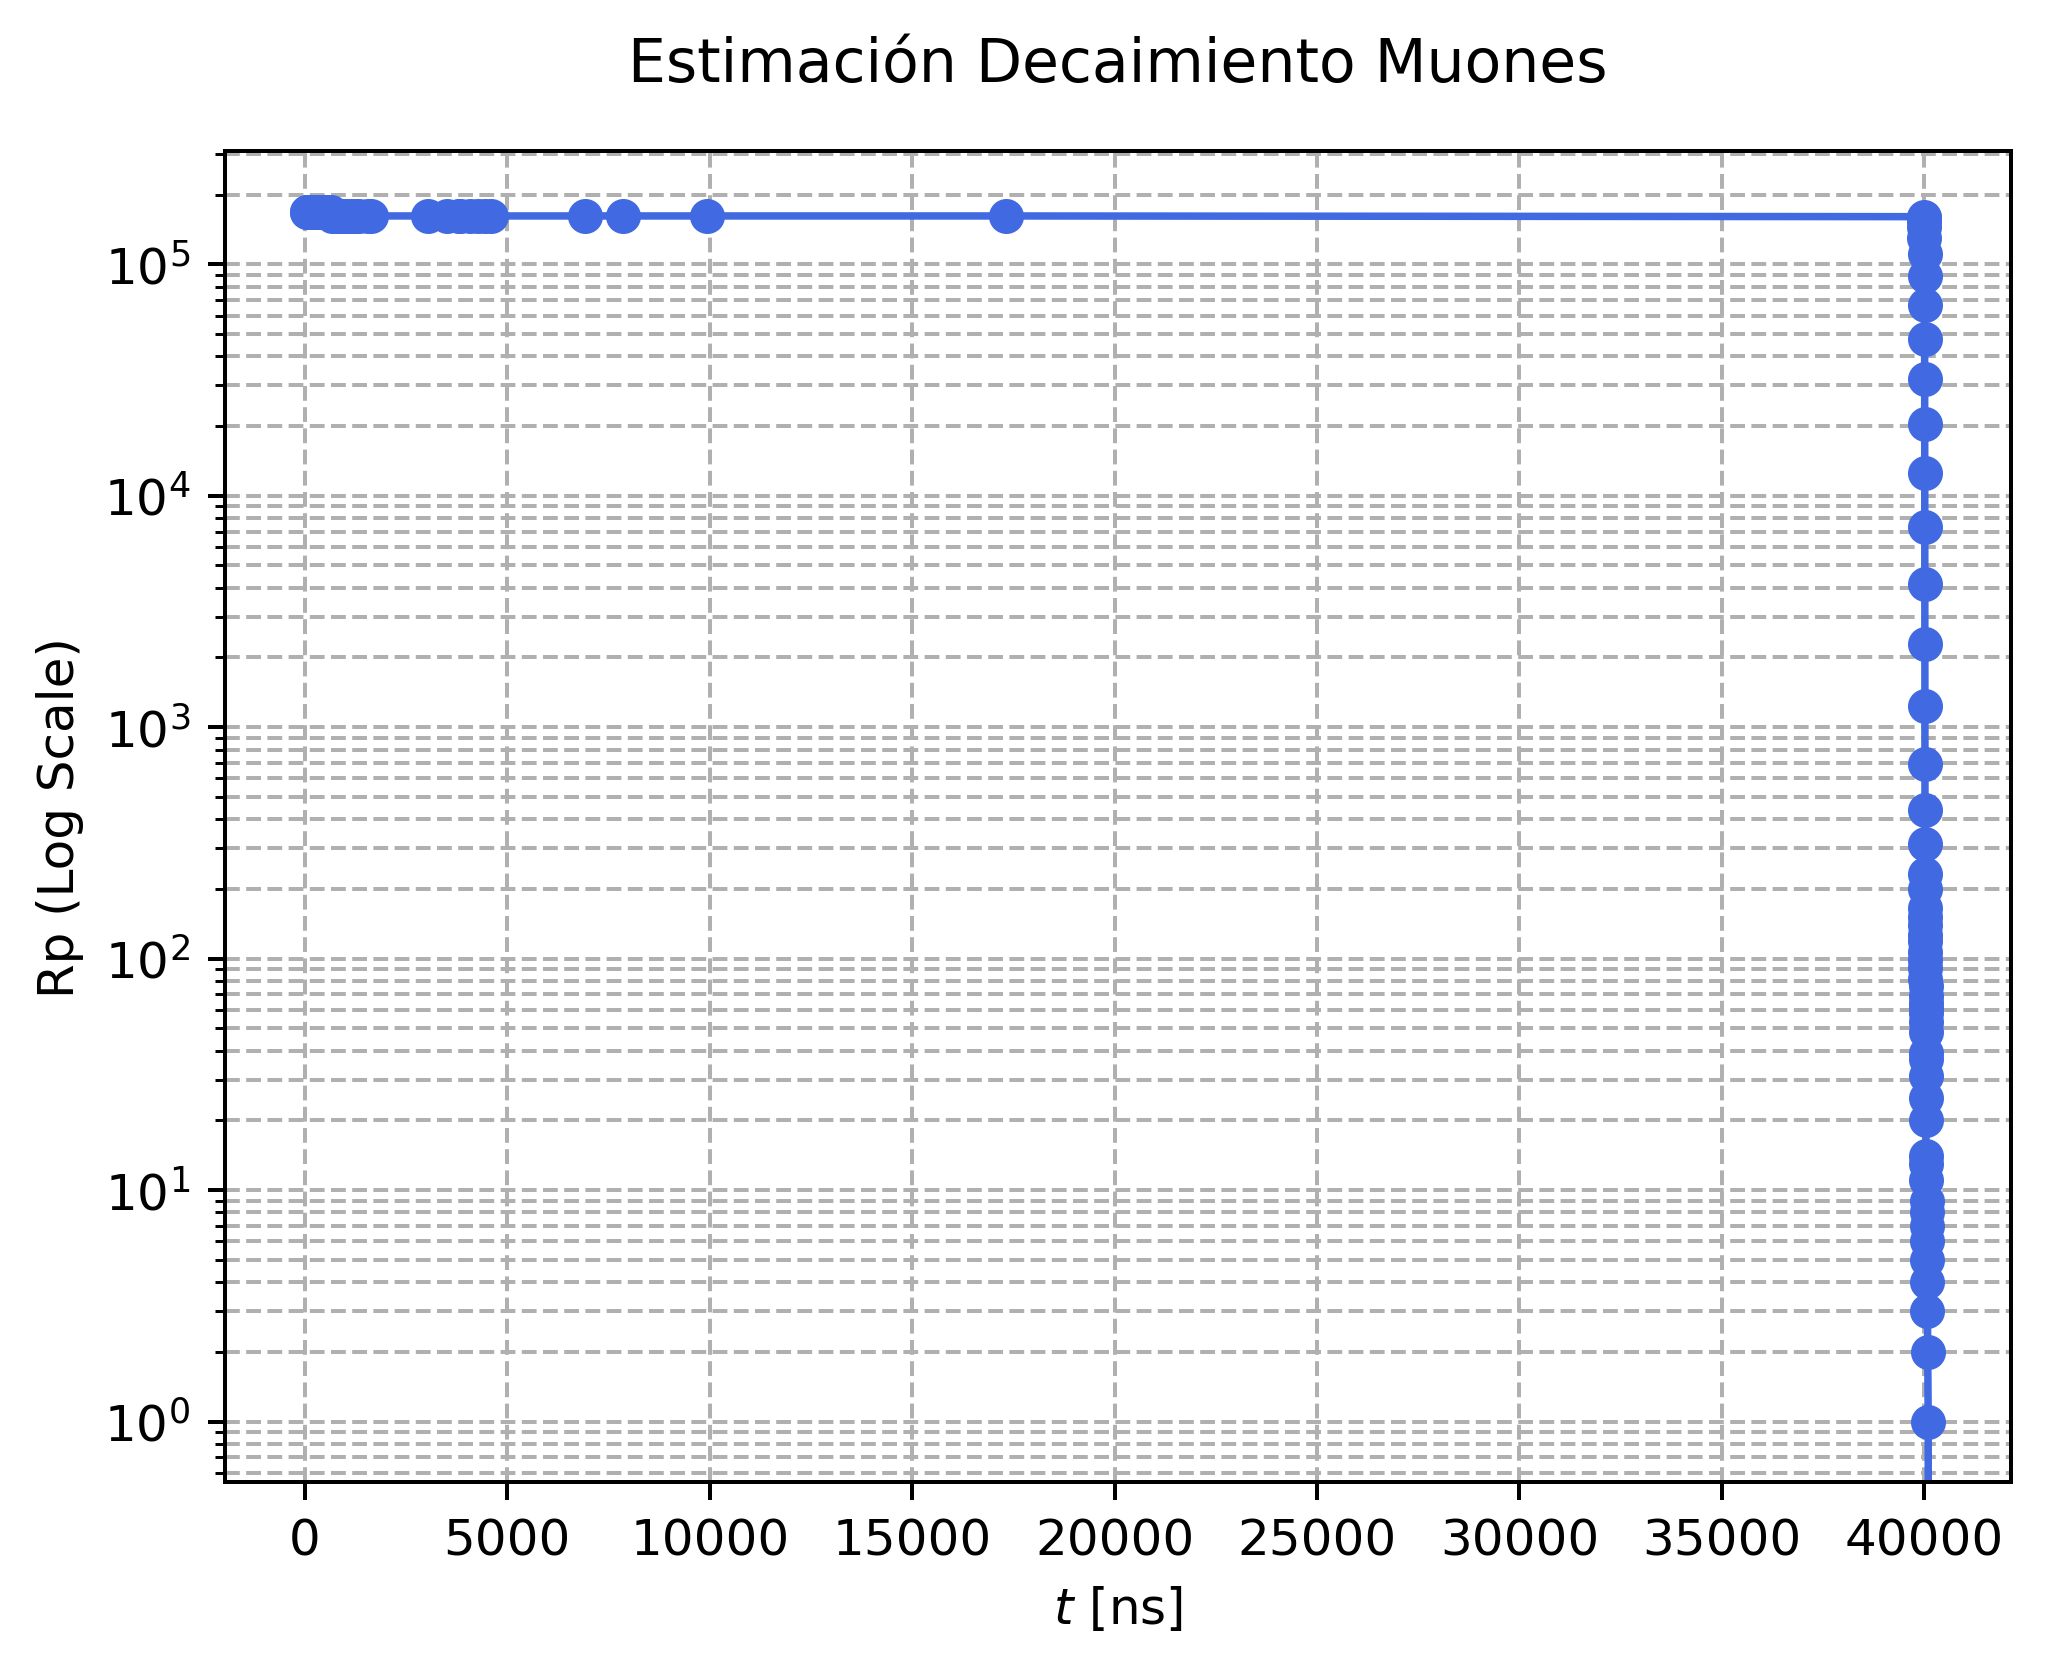

/Users/valeriatorresgomez/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


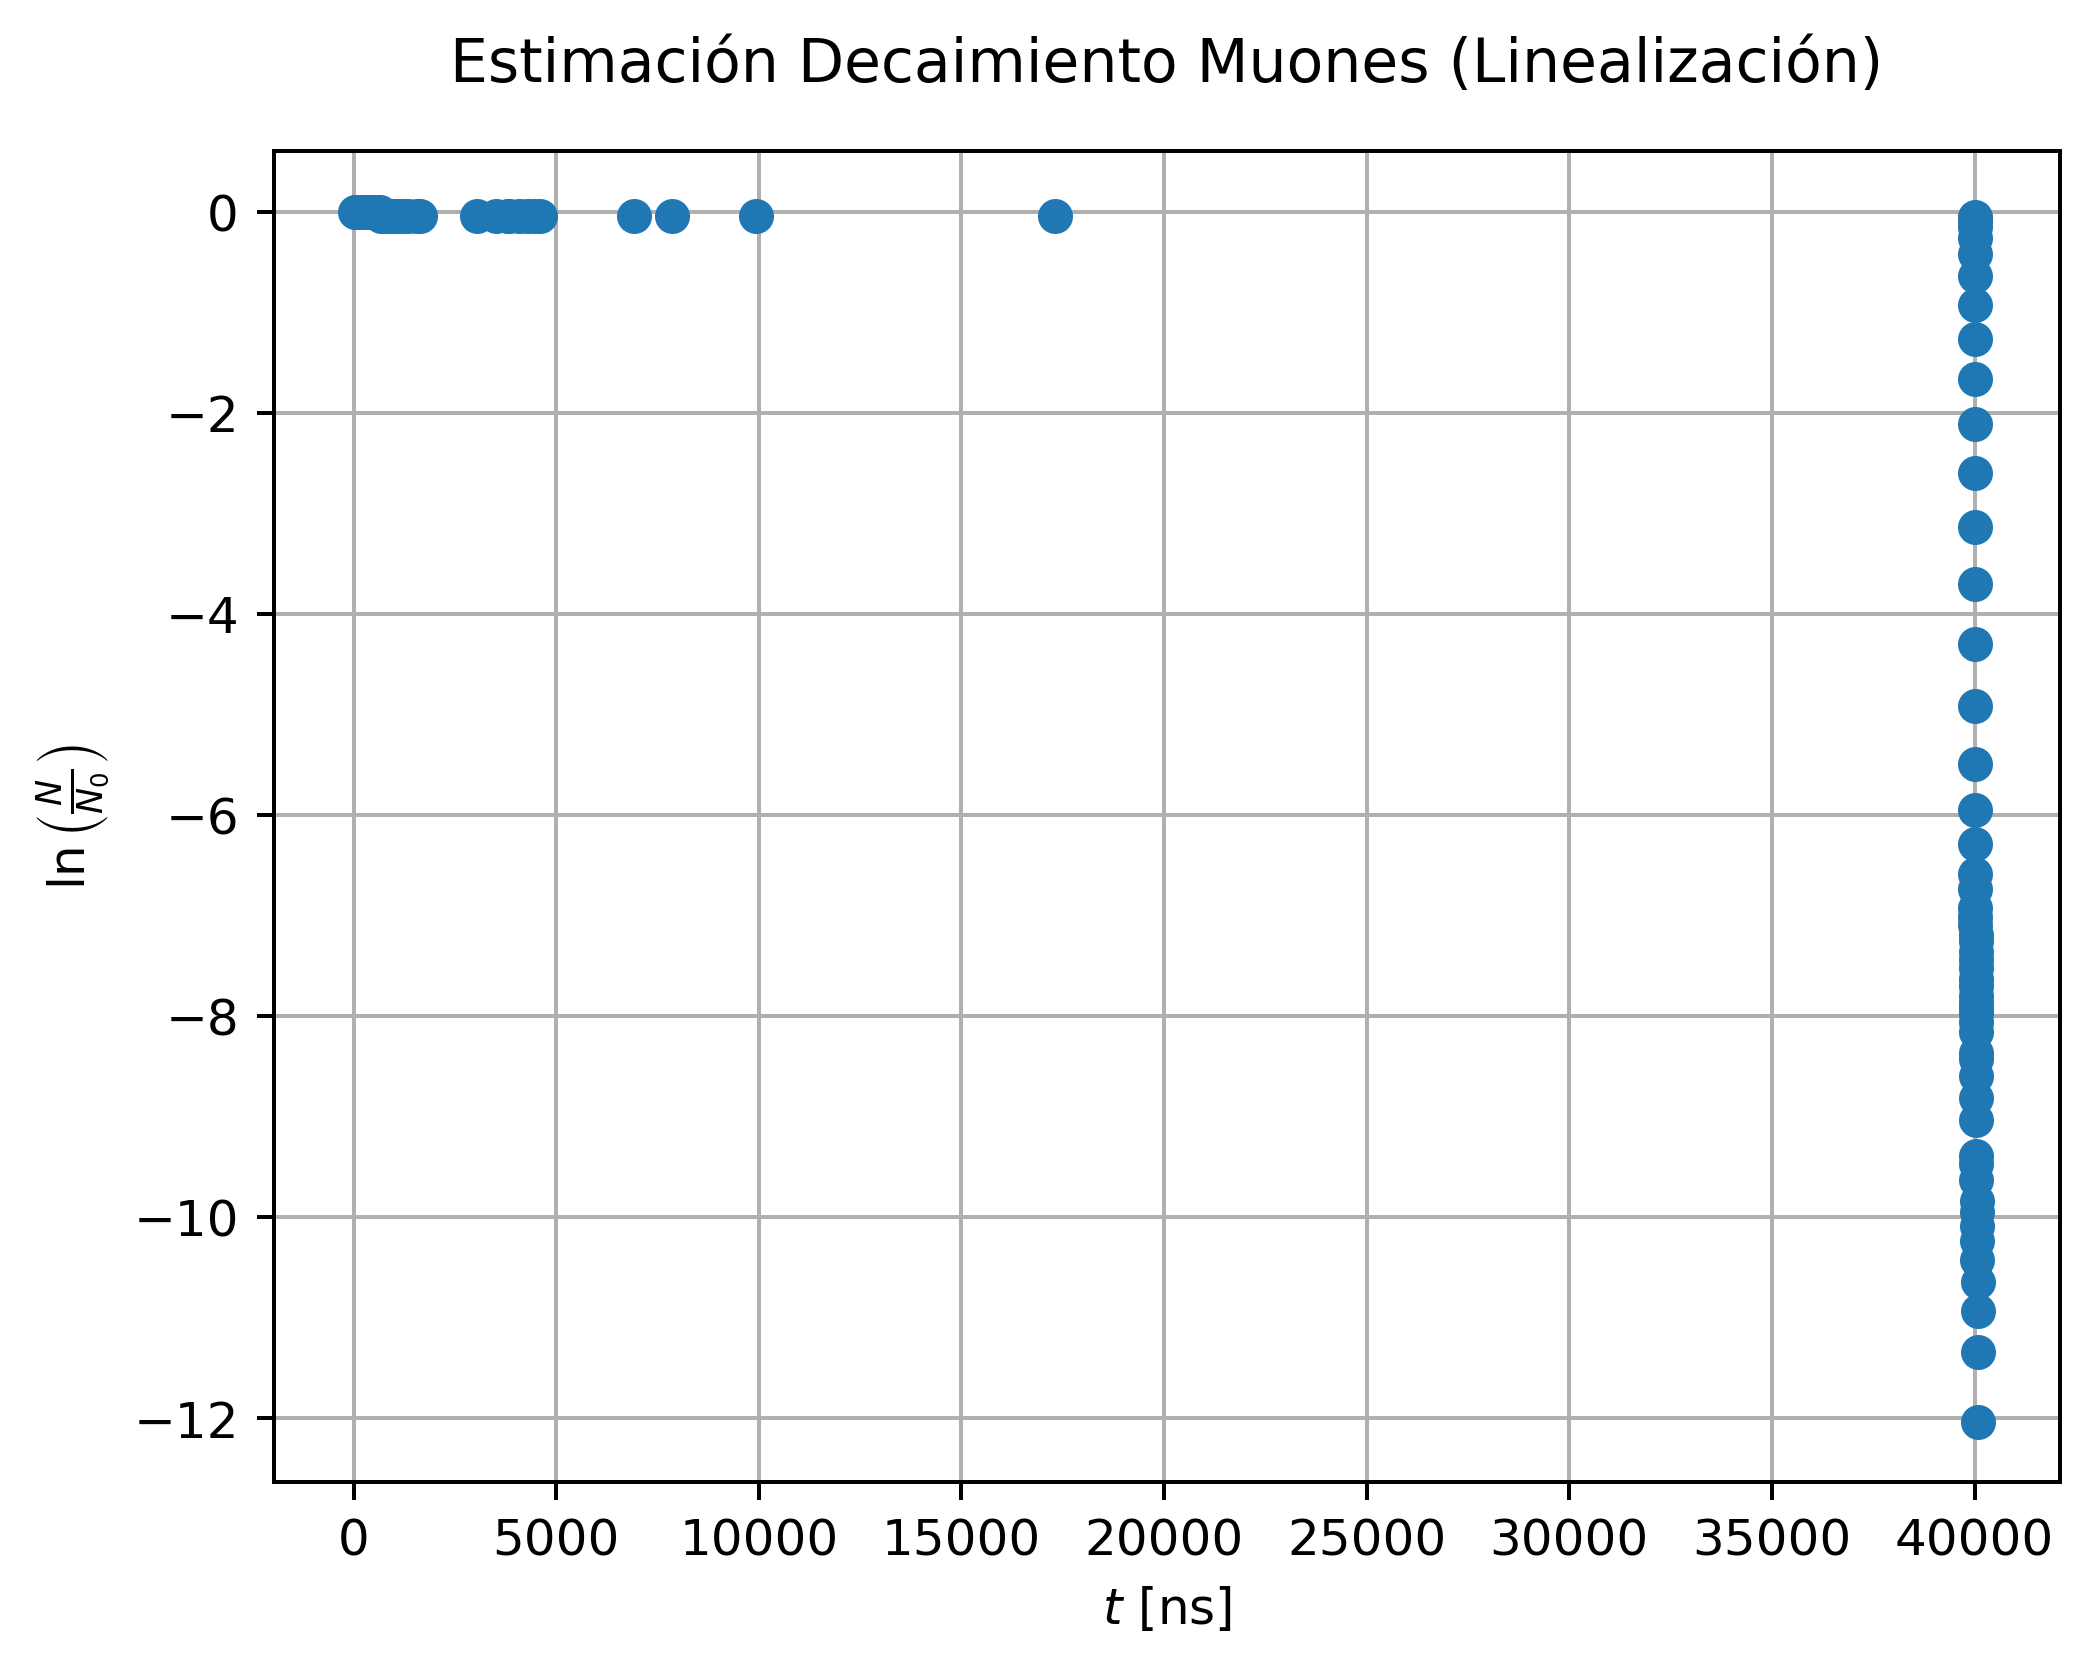

nan

In [89]:
data_path = './FisicaMuones-2024-03-08-DatosFinales.data'
data = pd.read_csv(data_path, sep=" ", header=None)
data.columns = ['Decay_Time', 'Timestamp']

data_sorted = data.sort_values(by='Decay_Time')

frequency = data_sorted['Decay_Time'].value_counts().sort_index()

cumulative_sum = frequency.cumsum()

N_0 = cumulative_sum.iloc[-1]

remaining_particles = N_0 - cumulative_sum
time_intervals = frequency.index
ln_ratio = np.log(remaining_particles / N_0)

plt.figure()
plt.semilogy(time_intervals, remaining_particles, marker='o', linestyle='-', color='royalblue')
plt.title('Estimación Decaimiento Muones', y=1.03)
plt.xlabel(r'$t$ [ns]')
plt.ylabel('Rp (Log Scale)')
plt.grid(True, which="both", ls="--")
plt.show()

slope, intercept, r_value, p_value, std_err = linregress(time_intervals, ln_ratio)

plt.figure()
plt.plot(time_intervals, ln_ratio, 'o')
plt.plot(time_intervals, intercept + slope*time_intervals, 'r')
plt.title('Estimación Decaimiento Muones (Linealización)', y=1.03)
plt.xlabel(r'$t$ [ns]')
plt.ylabel(r'$\ln{\left(\frac{N}{N_0}\right)}$')
plt.grid(True)
plt.show()

tau_exp = -1/slope
tau_exp

/Users/valeriatorresgomez/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


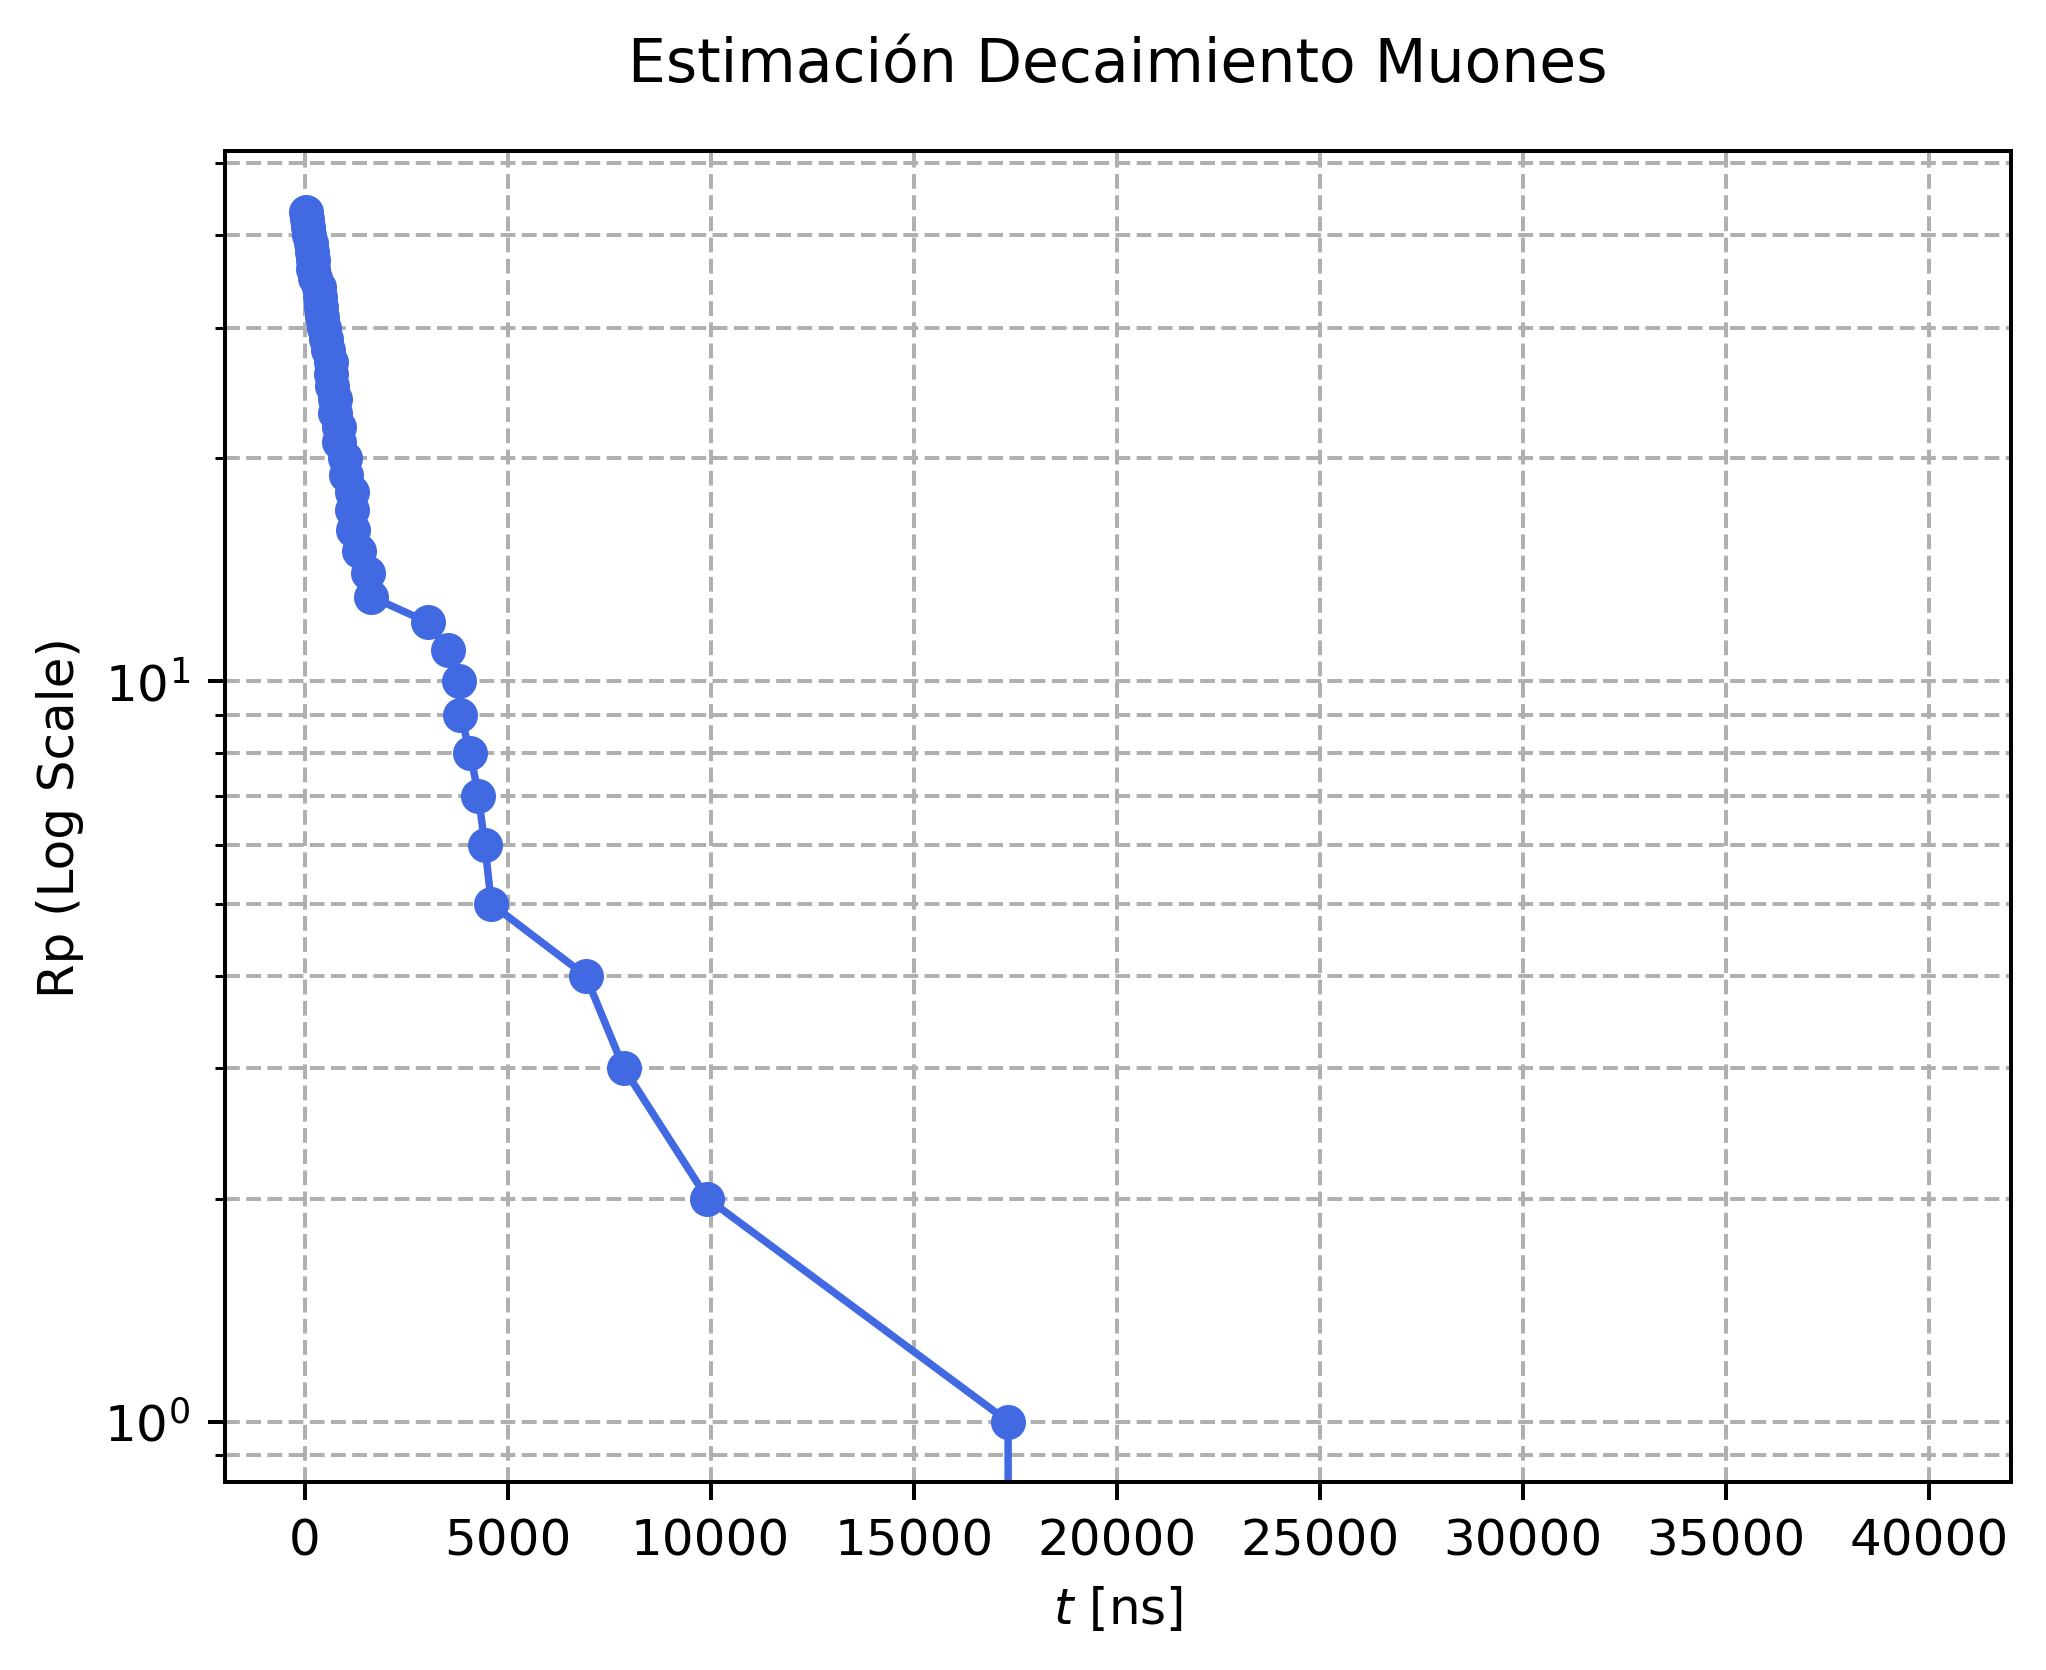

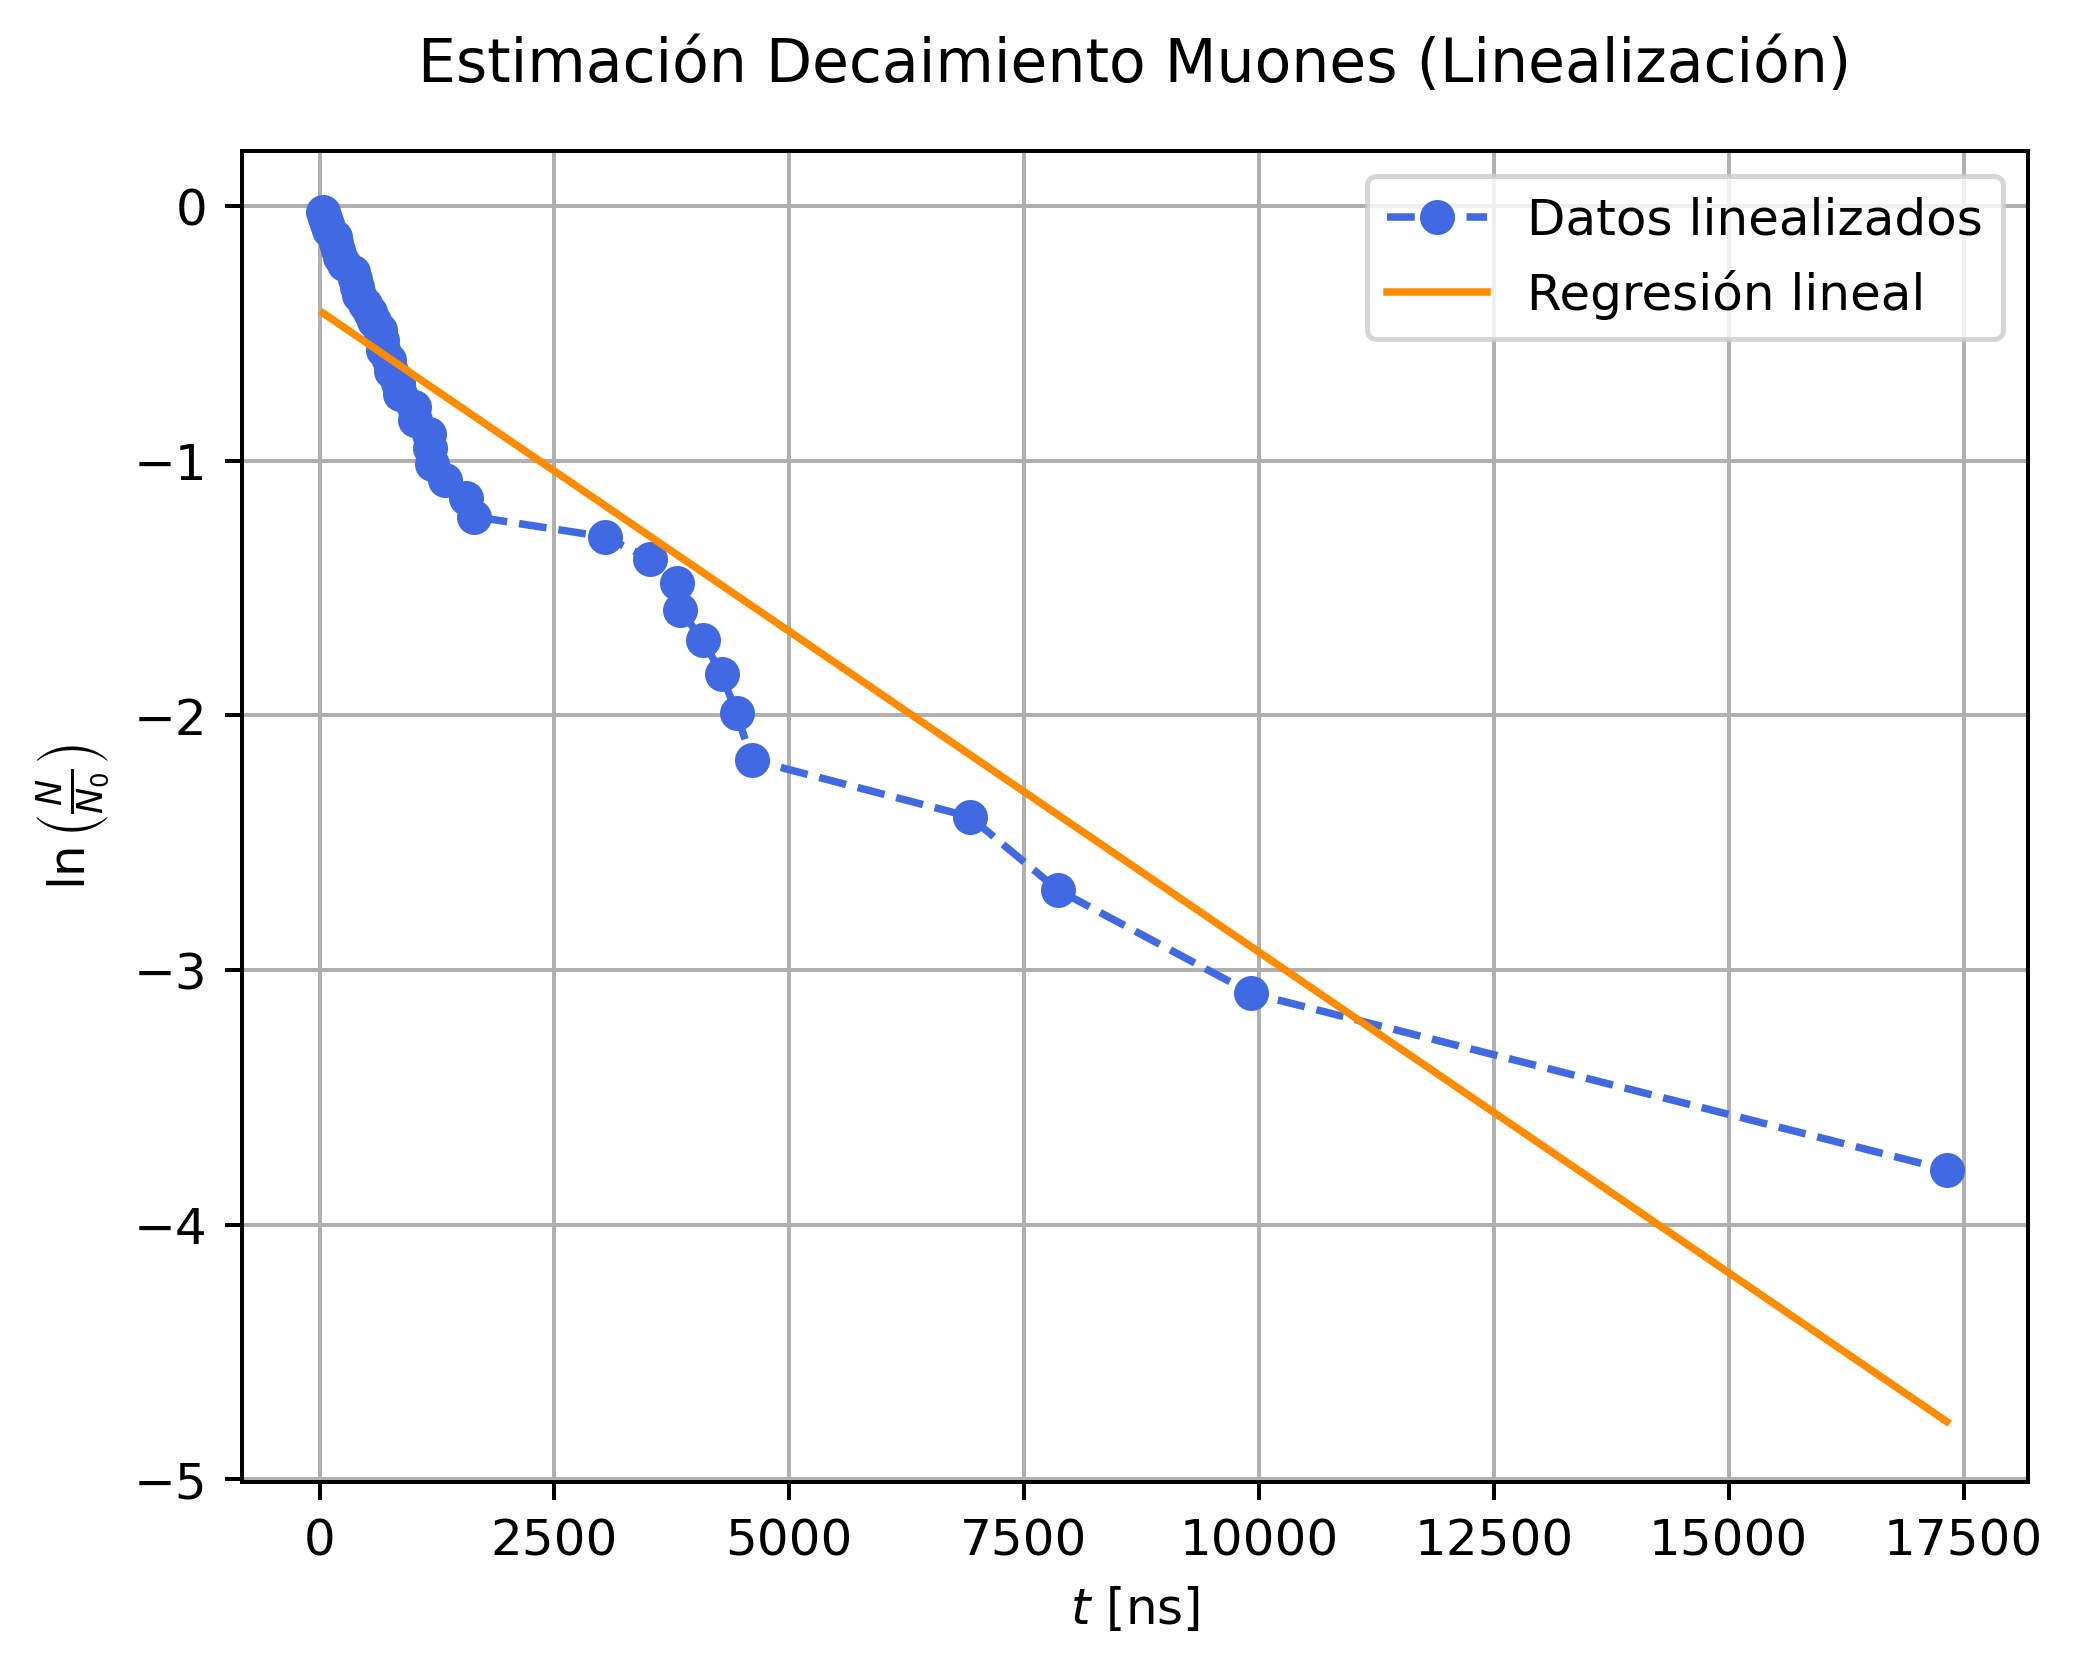

(3970.803617722707, 0.8815322330835186)

In [98]:
data_cleaned = data_sorted[data_sorted['Decay_Time'] <= 40000].drop_duplicates(subset='Decay_Time')

frequency_cleaned = data_cleaned['Decay_Time'].value_counts().sort_index()
cumulative_sum_cleaned = frequency_cleaned.cumsum()
N_0_cleaned = cumulative_sum_cleaned.iloc[-1]

remaining_particles_cleaned = N_0_cleaned - cumulative_sum_cleaned

ln_ratio_cleaned = np.log(remaining_particles_cleaned / N_0_cleaned)
time_intervals_cleaned = frequency_cleaned.index

plt.figure()
plt.semilogy(time_intervals_cleaned, remaining_particles_cleaned, marker='o', linestyle='-', color='royalblue')
plt.title('Estimación Decaimiento Muones', y=1.03)
plt.xlabel(r'$t$ [ns]')
plt.ylabel('Rp (Log Scale)')
plt.grid(True, which="both", ls="--")
plt.show()

valid_indices = ~np.isinf(ln_ratio_cleaned)
time_intervals_regression = time_intervals_cleaned[valid_indices]
ln_ratio_regression = ln_ratio_cleaned[valid_indices]

slope_cleaned, intercept_cleaned, r_value_cleaned, p_value_cleaned, std_err_cleaned = linregress(time_intervals_regression, ln_ratio_regression)

plt.figure()
plt.plot(time_intervals_regression, ln_ratio_regression, '--o', label='Datos linealizados', c='royalblue')
plt.plot(time_intervals_regression, intercept_cleaned + slope_cleaned * time_intervals_regression, 'darkorange', label='Regresión lineal')
plt.title('Estimación Decaimiento Muones (Linealización)', y=1.03)
plt.xlabel(r'$t$ [ns]')
plt.ylabel(r'$\ln{\left(\frac{N}{N_0}\right)}$')
plt.legend()
plt.grid(True)
plt.show()

tau_exp_cleaned = -1 / slope_cleaned
tau_exp_cleaned, r_value_cleaned**2